In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loading the dataset
df = pd.read_csv('/content/anemia_dataset.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [3]:
# checking the nulls
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [4]:
# droping the duplicates if any
df = df.drop_duplicates()

In [5]:
# checking the datatypes
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [6]:
# converting Gender and Result into objects
df[['Gender', 'Result']] = df[['Gender', 'Result']].astype('category')
cat_features = ['Gender', 'Result']
num_features = df.columns.drop(cat_features)
df.dtypes

Gender        category
Hemoglobin     float64
MCH            float64
MCHC           float64
MCV            float64
Result        category
dtype: object

In [7]:
# getting a statistical summary of dataset
df.describe()

,Hemoglobin,MCH,MCHC,MCV
count,534.000000,534.000000,534.000000,534.000000
mean,13.287079,22.911985,30.249438,85.647004
std,2.066276,3.948482,1.412312,9.604934
min,6.600000,16.000000,27.800000,69.400000
25%,11.600000,19.500000,29.000000,77.325000
50%,13.100000,22.750000,30.400000,85.450000
75%,14.975000,26.100000,31.475000,94.150000
max,16.900000,30.000000,32.500000,101.600000


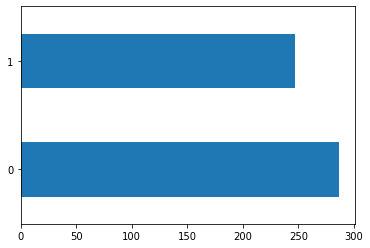

In [8]:
# checking if the dataset is balanced
df['Result'].value_counts().plot.barh();

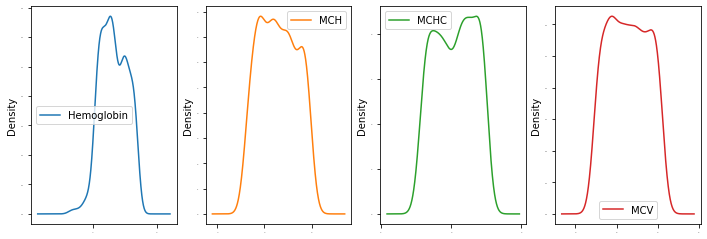

In [9]:
# checking the distribution of the numeric features
df[num_features].plot(kind='density', subplots=True, layout=(1,4), sharex=False, legend=True, fontsize=1, figsize=(12,4))
plt.show()

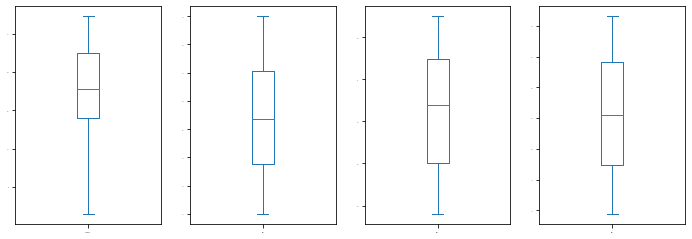

In [10]:
# checking if there is any outlier in the numeric features
df[num_features].plot(kind='box', subplots=True, layout=(1,4), sharex=False, legend=True, fontsize=1, figsize=(12,4))
plt.show()

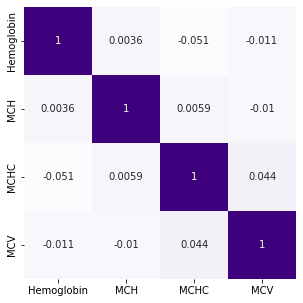

In [11]:
# finding the correlation
fig = plt.figure(figsize=(5,5))
sns.heatmap(df.drop(['Gender', 'Result'], axis=1).corr(), annot=True, square=True, cmap='Purples', cbar=False)
plt.show()

In [12]:
# creating X & y
X = df.drop('Result', axis=1)
y = df['Result']

In [13]:
# splitting the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
# training a model
model = DecisionTreeClassifier(random_state=101)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [15]:
# checking the accuracy
print(f"Training accuracy: {round(accuracy_score(y_train, model.predict(X_train)) * 100, 2)}")
print(f"Testing accuracy: {round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)}")

Training accuracy: 100.0
Testing accuracy: 100.0


In [16]:
# creating a CM
confusion_matrix(y_test, model.predict(X_test))

array([[57,  0],
       [ 0, 50]])

In [17]:
# printing the clf report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        50

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

